In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA #Import PCA function

In [12]:
data = pd.read_csv("./Downloads/data.csv", index_col=0)

In [22]:
print(data.head())
#Return the first five rows of data to make sure it was read in correctly

       normal_01  normal_02  normal_03  normal_04  normal_05  normal_06  \
A1BG          66        291         31         37         85        150   
A2BP1        175         10          1          0          1          0   
A2LD1       7147        298        207        298        252        251   
A2ML1       3762         52         45         19          8         22   
A2M           59      86768      87793      81222     103764      68114   

       normal_07  normal_08  normal_09  normal_10  ...  cancer_291  \
A1BG          43        108        251        313  ...         487   
A2BP1          0          7          1          1  ...           0   
A2LD1        281        213        245        274  ...          22   
A2ML1          4         95         37         62  ...          15   
A2M       101990     105197     144017     132241  ...       14941   

       cancer_292  cancer_293  cancer_294  cancer_295  cancer_296  cancer_297  \
A1BG         1042         379         204      

In [24]:
print(data.shape)

(17869, 350)


Dataset contains 350 Samples, 17,869 genes

In [40]:
#Center and scale the data so that the means for each gene are 0 and the std devs for each gene are 1. 
scaled_data = StandardScaler().fit_transform(data.T)
print(scaled_data)

[[-8.99965759e-01  4.13015297e-02  1.30035727e+01 ...  5.67226610e-01
  -1.84931310e+00 -5.65682608e-01]
 [-3.97592528e-01 -5.07932747e-02  9.22069655e-03 ...  7.91408203e-03
  -7.47321159e-01  8.93336646e-01]
 [-9.78112706e-01 -5.58166277e-02 -1.63430206e-01 ...  5.78336764e-03
  -8.91932494e-01  1.50563208e-01]
 ...
 [-1.14030749e-01 -5.63747780e-02  4.15234907e-01 ...  7.50315854e-02
  -6.11413283e-01 -5.28543936e-01]
 [-5.33791493e-01 -5.52584774e-02  2.10330539e-01 ... -3.52328844e-02
   1.61855663e-01 -5.45786891e-01]
 [-1.01606979e+00  1.86801736e+01  1.21668799e+01 ... -2.08444745e+00
   8.19971139e-01  2.04198271e+00]]


Pass through the transpose of the data so that the samples are read as columns, and the genes as rows.

Ref. https://www.youtube.com/watch?v=Lsue2gEM9D0

In [27]:
pca = PCA()

In [42]:
pca.fit(scaled_data)
#fit() fits the model by calculating the mean and std. dev

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [39]:
pca_data = pca.transform(scaled_data)
#transform() uses the parameters calculated by fit() to generate a transformed data set
print(pca_data)

[[ 6.96167986e+02  3.21600349e+02 -4.23894722e+02 ...  5.36133930e-03
   8.10153215e-03 -1.28230759e-13]
 [-1.23782384e+01  2.63349954e+01 -1.66776437e+00 ...  3.99787828e-01
  -6.86151564e-02  3.95516953e-15]
 [-2.87723489e+01  5.00896456e+01 -8.50717517e-01 ... -1.19726262e-01
   1.65646566e-01  1.15463195e-14]
 ...
 [-4.57841735e+00 -1.16278295e+01 -4.87721697e-01 ...  1.24052967e-01
  -6.65816635e-02  2.95596880e-15]
 [ 3.27020989e+00 -2.14787064e+01  6.80928170e-01 ... -3.06746340e-02
   1.18119753e-02  6.49480469e-15]
 [ 4.84361018e+02  2.78230731e+02  5.77369189e+02 ... -1.65965070e-03
   3.91060897e-03 -4.79616347e-14]]


In [32]:
percent_variation = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
#Calculate the percent variation that each principal component accounts for

In [34]:
labels = ['PC' + str(x) for x in range(1, len(percent_variation)+1)]

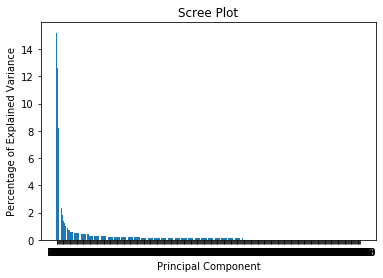

In [35]:
plt.bar(x=range(1,len(percent_variation)+1), height=percent_variation, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

The most variation in the data is on the left side of the graph with the large bars. Too much data, can't even read the x axis labels!!

In [43]:
df = pd.DataFrame(pca_data)

Suppose you were given the following preference data from a movie viewing system which contains 100 users
and 1 movie. Reported measurements are given as a binary outcome 1- viewed movie, and 0 - did not view the
movie (100 measurements total).

You are also given features describing each of the users in the following forms:
20000 real valued measurements per user
600 sparse binary measurements per user
3 user types: age 20-30, age 31-40, age 41-50 per user

<b>Question 6: How would you find features that are most associated with reported movie viewing?</b>
<br>Feature selection techniques in ML can be used to select features that are most closely associated with the desired output. In this case, I would use Univariate Selection to return the most relevant features (which ones are most strongly associated with an outcome of 1). The output will be numerical, and you can even display it as a bar graph to easily understand how the values compare to one another.


<b>Question 7: How would you determine if these associations are statistically significant?
Suppose we expanded the movie library to include 10 movies. The viewing system reported a 100x10 binary
matrix that takes the values {1 - viewed, 0 - not viewed} with 100 rows (one per user) and 10 columns (one per
movie). You are also given 50 sparse features describing each one of the movies. </b>

<b>Question 8: How would you find combinations of user and movie features that are associated with reported
movie viewing across the 10 movies?</b>

<b>Question 9: How would you determine if these associations are statistically significant?</b>

<b>Question 10: How would you modify your algorithm to deal with a dataset comprising of 1 million users, and
10,000 movies?</b>
